In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
RANDOM_STATE = 67

df = pd.read_pickle("./filtered_data.pkl")
df["outcome"] = (df["outcome_name"] == "Goal").astype(int)
df

,outcome_name,under_pressure,sub_type_name,body_part_name,shot_first_time,x,y,pass_deflected,shot_one_on_one,play_pattern_name,type_name,goalkeeper_position_name,technique_name,distance_to_goal,angle_to_goal,outcome
0,Blocked,NaN,Open Play,Right Foot,NaN,107.1,26.6,NaN,NaN,Regular Play,Shot,NaN,Normal,18.600269,15.850859,0
1,Blocked,NaN,Open Play,Right Foot,NaN,113.7,54.0,NaN,NaN,Regular Play,Shot,NaN,Normal,15.352199,11.720028,0
2,Off T,1.0,Open Play,Left Foot,True,115.7,50.5,NaN,NaN,Regular Play,Shot,NaN,Overhead Kick,11.346365,15.263642,0
3,Off T,NaN,Open Play,Head,NaN,113.9,38.6,NaN,NaN,From Throw In,Shot,NaN,Normal,6.258594,299.994760,0
4,Wayward,NaN,Open Play,Right Foot,NaN,96.7,47.2,NaN,NaN,From Free Kick,Shot,NaN,Half Volley,24.387087,16.351007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19811,Saved,NaN,Open Play,Right Foot,NaN,109.1,29.8,NaN,NaN,Regular Play,Shot,NaN,Normal,14.928161,20.853466,0
19812,Saved,NaN,Open Play,Right Foot,NaN,114.6,51.4,NaN,True,From Counter,Shot,NaN,Normal,12.614278,15.176401,0
19813,Blocked,NaN,Open Play,Right Foot,NaN,98.3,56.9,NaN,NaN,From Throw In,Shot,NaN,Normal,27.504545,12.065808,0
19814,Saved,NaN,Open Play,Left Foot,NaN,102.9,58.1,NaN,NaN,Regular Play,Shot,NaN,Normal,24.900201,11.658888,0


In [7]:
X = df[['body_part_name', 'sub_type_name', 'distance_to_goal', 'angle_to_goal', 'under_pressure', 'shot_first_time']] # pongo estas dos features nuevas - johan
y = df['outcome']


X = X.fillna(0)
X = pd.get_dummies(X, dtype=int) # right way to do it - johan

X

,distance_to_goal,angle_to_goal,under_pressure,body_part_name_Head,body_part_name_Left Foot,body_part_name_Other,body_part_name_Right Foot,sub_type_name_Corner,sub_type_name_Free Kick,sub_type_name_Open Play,sub_type_name_Penalty,shot_first_time_0,shot_first_time_True
0,18.600269,15.850859,0.0,0,0,0,1,0,0,1,0,1,0
1,15.352199,11.720028,0.0,0,0,0,1,0,0,1,0,1,0
2,11.346365,15.263642,1.0,0,1,0,0,0,0,1,0,0,1
3,6.258594,299.994760,0.0,1,0,0,0,0,0,1,0,1,0
4,24.387087,16.351007,0.0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19811,14.928161,20.853466,0.0,0,0,0,1,0,0,1,0,1,0
19812,12.614278,15.176401,0.0,0,0,0,1,0,0,1,0,1,0
19813,27.504545,12.065808,0.0,0,0,0,1,0,0,1,0,1,0
19814,24.900201,11.658888,0.0,0,1,0,0,0,0,1,0,1,0


In [8]:
from sklearn.model_selection import train_test_split # hay q splitear antes de hacer scaling - johan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [10]:
# We will try to see what accuracy we would get if we made a model which would always say that we didn't score
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss  # Allegedly log loss might be good para medir la performance del model - johan

no_goals = np.zeros_like(y_test)
accuracy_score(y_test, no_goals)

0.9023011707710941

Therefore anything under 0.9023 accuracy underperforms our benchmark and should therefore be rejected

NO PENALTY, RIDGE AND LASSO

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200, random_state=RANDOM_STATE, penalty = None).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9095680258377069

In [69]:
clf_with_l2 = LogisticRegression(max_iter= 200, random_state = RANDOM_STATE,C= 0.1, penalty='l2').fit(X_train, y_train)
y_pred_l2 = clf_with_l2.predict(X_test)
clf_with_l2.score(X_test, y_test)

0.9091643116673396

In [74]:
clf_with_l1 = LogisticRegression(
    max_iter=200,
    random_state=RANDOM_STATE,
    C=0.1,
    penalty='l1',
    solver='liblinear'
).fit(X_train, y_train)

y_pred_l1 = clf_with_l1.predict(X_test)
clf_with_l1.score(X_test, y_test)

0.9093661687525232

In [12]:
confusion_matrix(y[y_test.index], y_pred)

array([[4459,   11],
       [ 437,   47]])

In [13]:
#Implementation of Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
bys = gnb.fit(X_train, y_train)
#el parameter de priors lo dejo por defecto porque es solo si la data doesen't portray el mundo real
#el de var_smoothing tampoco lo toco porque por default se usa este valor para prevenir overfitting



In [14]:
y_pred_gnb = bys.predict(X_test)
bys.score(X_test, y_test)

0.9081550262414211

In [15]:
confusion_matrix(y_test, y_pred_gnb)

array([[4458,   12],
       [ 443,   41]])

In [16]:
#Implementation of Decision Tree
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE) # max_depth=25 es overfitting af - johan
treeclf.fit(X_train, y_train)
treeclf.score(X_test, y_test)


0.9099717400080742

In [17]:
confusion_matrix(y_test, treeclf.predict(X_test))

array([[4457,   13],
       [ 433,   51]])

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9644731530076706

In [19]:
# The accuracy is suspiciously high
print(rf_clf.feature_importances_) # We check if there is something wrong with our features (possible data leak)
confusion_matrix(y_test, y_pred)

[0.46886712 0.45223588 0.01116319 0.00683717 0.00338359 0.00163257
 0.00489235 0.00064996 0.00457718 0.01064122 0.02908333 0.00299807
 0.00303836]


array([[4409,   61],
       [ 115,  369]])

In [20]:
#Implementation Ensamble Learing (hard voting)
from sklearn.ensemble import VotingClassifier
clf_hard_voting = VotingClassifier(
    estimators=[('lr', clf), ('dt', treeclf), ('bys', bys), ('rf', rf_clf)], # As they have all surpassed 0.9023 we can use them all
    voting = 'hard')
clf_hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=67)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=67)),
                             ('bys', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=67))])

In [21]:
pred_hardvoting = clf_hard_voting.predict(X_test)
accuracy_hardvoting = accuracy_score(y_test,pred_hardvoting)
accuracy_hardvoting

0.9089624545821559

In [22]:
from typing import List

def compare_classifiers_accuracies(clfs: List[object], X_train, X_test, y_train, y_test):
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))

compare_classifiers_accuracies([clf, treeclf, bys, rf_clf, clf_hard_voting], X_train, X_test, y_train, y_test)

LogisticRegression: 0.9095680258377069
DecisionTreeClassifier: 0.9099717400080742
GaussianNB: 0.9081550262414211
RandomForestClassifier: 0.9644731530076706
VotingClassifier: 0.9089624545821559


In [23]:
#Implementation Ensamble Learing (soft voting)
clf_soft_voting = VotingClassifier(
    estimators=[('lr', clf), ('dt', treeclf), ('bys', bys), ('rf', rf_clf)],
    voting = 'soft') # he quitado las weights pq resulta en overfitting - johan
clf_soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=67)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=67)),
                             ('bys', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=67))],
                 voting='soft')

In [24]:
pred_softvoting = clf_soft_voting.predict(X_test)
accuracy_softvoting = accuracy_score(y_test,pred_softvoting)
accuracy_softvoting

0.9103754541784417

In [25]:
compare_classifiers_accuracies([clf, treeclf, bys, rf_clf, clf_hard_voting, clf_soft_voting], X_train, X_test, y_train, y_test)

LogisticRegression: 0.9095680258377069
DecisionTreeClassifier: 0.9099717400080742
GaussianNB: 0.9081550262414211
RandomForestClassifier: 0.9644731530076706
VotingClassifier: 0.9089624545821559
VotingClassifier: 0.9103754541784417


In [26]:
# It looks like something is contaminating our soft voting (probably naive bayes), we will try without it
clf_soft_voting_2 = VotingClassifier(
    estimators=[('lr', clf), ('dt', treeclf), ('rf', rf_clf)],
    voting = 'soft')
clf_soft_voting_2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=67)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=67)),
                             ('rf', RandomForestClassifier(random_state=67))],
                 voting='soft')

In [27]:
pred_softvoting_2 = clf_soft_voting_2.predict(X_test)
accuracy_softvoting_2 = accuracy_score(y_test,pred_softvoting_2)
accuracy_softvoting_2

0.9140088817117481

In [28]:
Pred_Proba_Ensamble = clf_soft_voting.predict_proba(X_test)
Pred_Proba_LogisticR = clf.predict_proba(X_test)
Pred_Proba_GNB = bys.predict_proba(X_test)
Pred_Proba_Tree = treeclf.predict_proba(X_test)

def Goal_Prob_Models(models=[clf, bys, treeclf,clf_soft_voting]):
    for model in models:
        print(f"{model.__class__.__name__}:",model.predict_proba(X_test))

Goal_Prob_Models()
# No lo entiendo - johan

LogisticRegression: [[0.85402368 0.14597632]
 [0.83915942 0.16084058]
 [0.88785685 0.11214315]
 ...
 [0.68243923 0.31756077]
 [0.99198691 0.00801309]
 [0.94573738 0.05426262]]
GaussianNB: [[9.99999888e-01 1.12033235e-07]
 [9.99999889e-01 1.10773108e-07]
 [9.99999968e-01 3.15599327e-08]
 ...
 [9.99999842e-01 1.57913451e-07]
 [9.99999999e-01 1.09231276e-09]
 [9.99999966e-01 3.44638305e-08]]
DecisionTreeClassifier: [[0.81981033 0.18018967]
 [0.83021077 0.16978923]
 [0.88665636 0.11334364]
 ...
 [0.81981033 0.18018967]
 [0.96724497 0.03275503]
 [0.96724497 0.03275503]]
VotingClassifier: [[0.86345847 0.13654153]
 [0.90484252 0.09515748]
 [0.9186283  0.0813717 ]
 ...
 [0.87056235 0.12943765]
 [0.98980797 0.01019203]
 [0.97824558 0.02175442]]


In [62]:
probabilities = clf.predict_proba(X_test)[:, 1]
df_prob = pd.DataFrame(probabilities, columns=['xG'])
finaldf = pd.concat([df_prob,X_test], axis=1)
finaldf


,xG,distance_to_goal,angle_to_goal,under_pressure,body_part_name_Head,body_part_name_Left Foot,body_part_name_Other,body_part_name_Right Foot,sub_type_name_Corner,sub_type_name_Free Kick,sub_type_name_Open Play,sub_type_name_Penalty,shot_first_time_0,shot_first_time_True
0,0.145976,-0.689052,-0.566099,-0.527998,-0.441568,-0.642551,-0.041048,0.917531,-0.011601,-0.210396,0.233754,-0.096811,-1.544980,1.544980
1,0.160841,-1.502491,-0.461109,-0.527998,2.264654,-0.642551,-0.041048,-1.089881,-0.011601,-0.210396,0.233754,-0.096811,0.647257,-0.647257
2,0.112143,-0.286961,-0.594177,-0.527998,-0.441568,-0.642551,-0.041048,0.917531,-0.011601,-0.210396,0.233754,-0.096811,0.647257,-0.647257
3,0.020988,0.905283,-0.650855,-0.527998,-0.441568,-0.642551,-0.041048,0.917531,-0.011601,-0.210396,0.233754,-0.096811,-1.544980,1.544980
4,0.434494,-1.652051,1.364163,-0.527998,-0.441568,-0.642551,-0.041048,0.917531,-0.011601,-0.210396,0.233754,-0.096811,-1.544980,1.544980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,0.067021,-0.986819,-0.508573,1.893947,2.264654,-0.642551,-0.041048,-1.089881,-0.011601,-0.210396,0.233754,-0.096811,0.647257,-0.647257
4950,0.015549,1.201884,-0.654402,-0.527998,-0.441568,1.556296,-0.041048,-1.089881,-0.011601,-0.210396,0.233754,-0.096811,0.647257,-0.647257
4951,0.317561,-1.071003,1.583770,-0.527998,-0.441568,-0.642551,-0.041048,0.917531,-0.011601,-0.210396,0.233754,-0.096811,0.647257,-0.647257
4952,0.008013,1.717711,-0.673215,-0.527998,-0.441568,1.556296,-0.041048,-1.089881,-0.011601,-0.210396,0.233754,-0.096811,0.647257,-0.647257


In [51]:
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen

AttributeError: 'list' object has no attribute 'x'

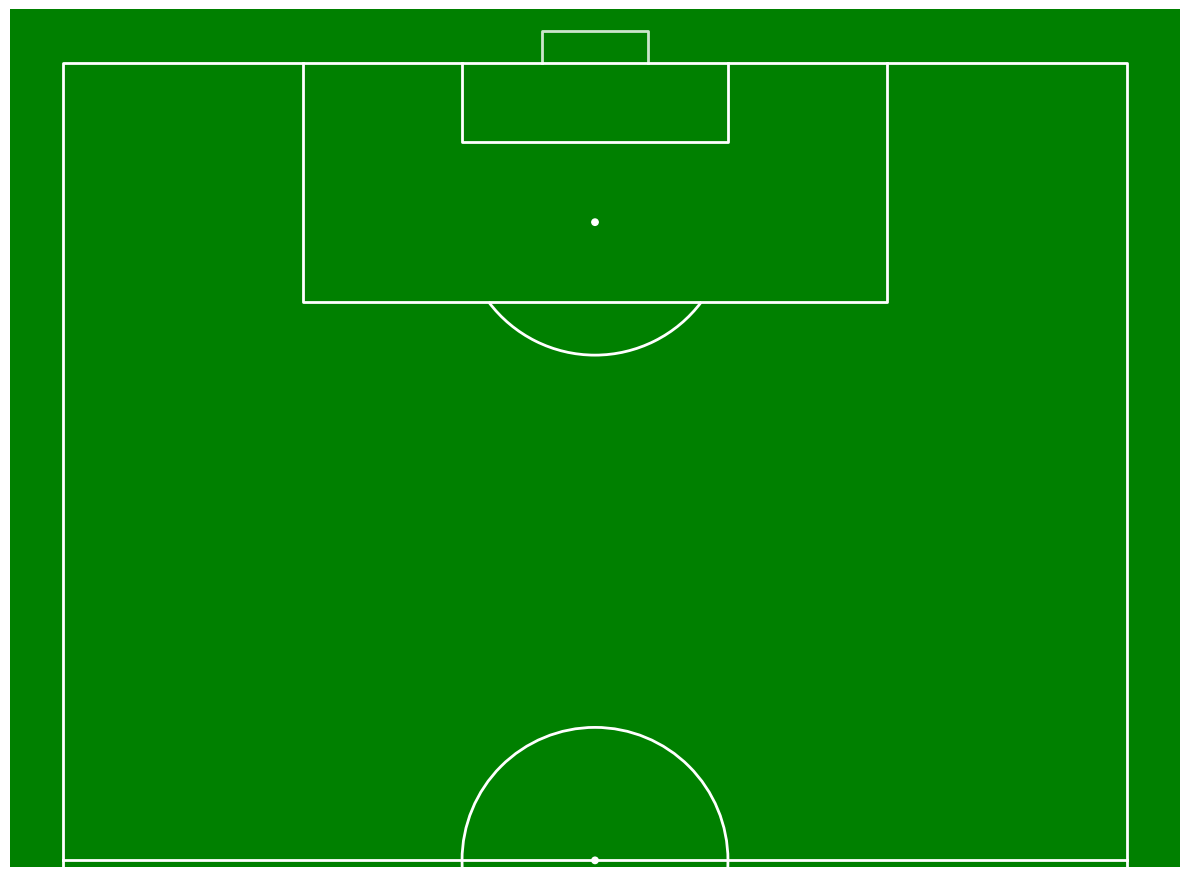

In [56]:
# filter goals / non-shot goals
df_goals = [df == 'Goal'].copy()
df_non_goal_shots = [df != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='green', line_color='white')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='red',
                    marker='o',
                    ax=ax, label="No goal")

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='gold',
                    marker='o',
                    ax=ax, label="Goal")

plt.legend(loc='best')
plt.show()